In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import scipy.integrate as integ
from scipy.optimize import curve_fit
import simulation_utility as su
import time
import json
import os
import math

../data/SiPM_readout_1_0_run_0.txt
Number of waveforms 5, time to read 0.01


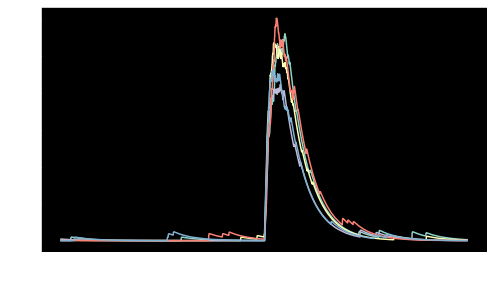

In [15]:
# reading waveforms from all .txt files in the indicated path, also with plot
wfs1=su.read_waveforms_from_json(path='../data', plot=5)

In [9]:
# run without doing fits, really fast
# "area" variable is ok for simulated data
df0 = su.calculate_integrals( wfs1, nn = 5, inf = 1000, sup=1500)

Total events: 5


Total events: 5
peak position not found in trigger region []


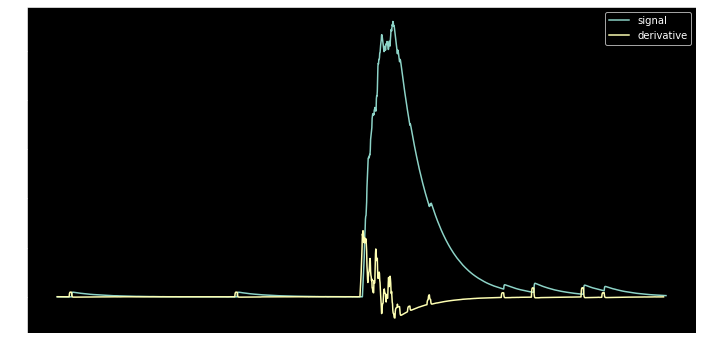

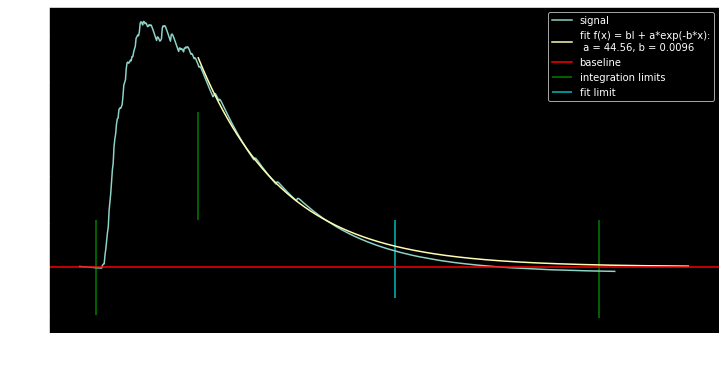

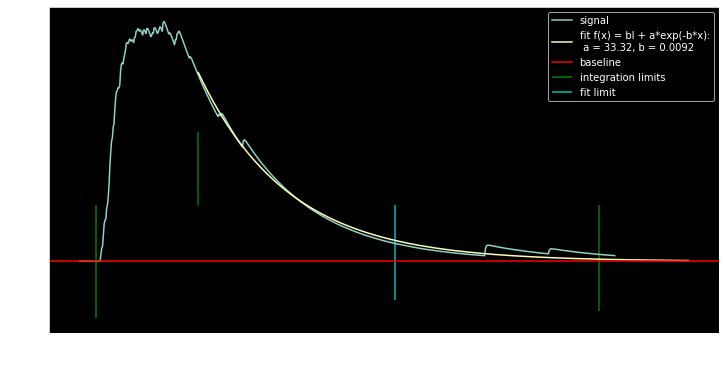

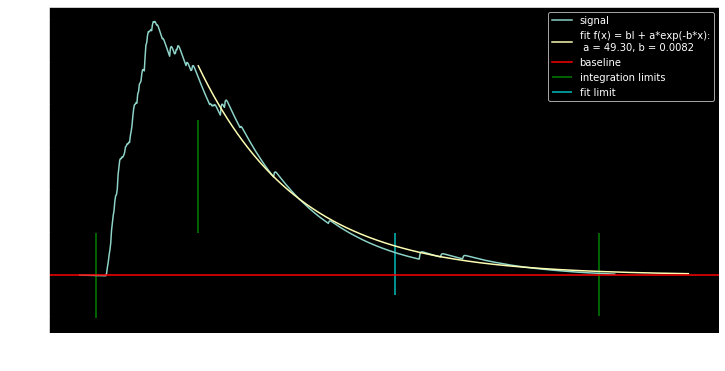

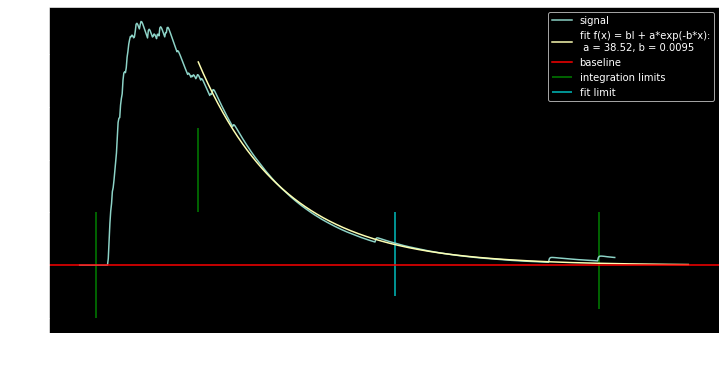

In [10]:
# run for 10 events with fits and showing plots
df1 = su.calculate_integrals( wfs1, nn = 5, inf = 1000, sup=1500,
                             plot = 1, calc_int = 1)

In [11]:
# run for all events with fits, a little bit slower
df = su.calculate_integrals(wfs1, nn=5, inf=950, sup=1100, plot=0, calc_int=1)

Total events: 5


In [12]:
def plot_area(area, area2 = None, xrange=(100,25000), bins=200, log=False ):
    print(f'n. events: 1PE={len(area)}')
    h, x = np.histogram(area,bins=bins,range=xrange)
    if area2 is not None:
        h2, x2 = np.histogram(area2,bins=bins,range=xrange)
    plt.figure(figsize=(8,4.5))
    plt.plot(x[1:],h,label='area')
    if area2 is not None:
        plt.plot(x2[1:],h2,label='integrals')
    if log: plt.yscale('log')
    plt.legend()

n. events: 1PE=5


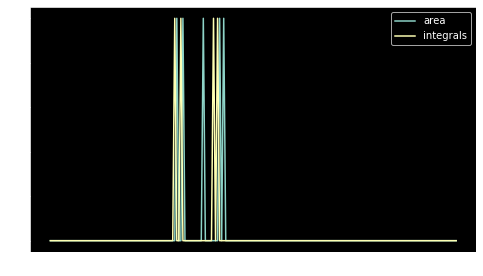

In [14]:
plot_area(df['area'],df['integral'],log=0)

# Comments
The fit is not optimized and a lot of events are not processed with the method. I think that you can simply use the 'area' variable for your application. Maybe we can discuss with the others at the next meeting